In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from netCDF4 import Dataset, num2date
from ipdb import set_trace as mybreak
import pyicon as pyic
import cartopy.crs as ccrs
import glob
import pickle
import maps_icon_smt_temp as smt
import datetime
from matplotlib.patches import Rectangle
import cfgrib
import xarray as xr
import pandas as pd
import gsw
import matplotlib.gridspec as gridspec
from icon_smt_levels import dzw, dzt, depthc, depthi

-----calc
sys glob os
numpy
netcdf
Done modules calc.
-----calc_xr
sys glob os
numpy
netcdf
xarray


KeyboardInterrupt: 

### calculations

#### horizontal Ri

In [ ]:
# depth
iz = 16
print('depth =', depthi[iz])
# coriolis
f=2*2*np.pi/86400*np.sin(40*np.pi/180.)
f2 = f**2

In [ ]:
path_data    = '/work/mh0033/u241317/smt/N2/pp_calc_N2_period_2010-03-15T23:00:00.nc'
dN2 = xr.open_dataset(path_data)
N2 = dN2.isel(depthi=iz).N2

In [ ]:
path_data    = '/work/mh0033/u241317/smt/db/pp_calc_b_period_2010-03-15T23:00:00.nc'
db = xr.open_dataset(path_data)
b  = db.b.isel(depthi=iz)
dbdx = db.dbdx.isel(depthi=iz)
dbdy = db.dbdy.isel(depthi=iz)
M2 = (dbdx**2 + dbdy**2)

In [ ]:
Ri_b = N2 * f2  / M2

In [ ]:
# load calculated
path_data = '/mnt/lustre01/work/mh0287/users/leonidas/icon/ngSMT/results/2010-03/ngSMT_tke_vort_f_50m_20100301T010000Z.nc'
ds_vort      = xr.open_dataset(path_data)
vort         = ds_vort.vort_f_cells_50m.isel(time=0)
ds_vort.time.isel(time=0)

In [ ]:
# read out vorticity
varfile = 'vort_f_50m'
path_dat  = '/mnt/lustre01/work/mh0287/users/leonidas/icon/ngSMT/results/'
month_dat = '2010-03/'
pdtime    = pd.to_datetime(timesd[step]) 
tstr      = pdtime.strftime('%Y%m%d')+'T010000Z'
fname     = f'{run}_{varfile}_{tstr}.nc'
fpath     = f'{path_dat}{month_dat}{fname}'
ds_vort   = xr.open_dataset(fpath)
vort      = ds_vort.vort_f_cells_50m.isel(time=itsd[step])

#### horizontal wT

In [ ]:
#path_data    = '/work/mh0033/u241317/smt/T/pp_calc_T_interp.nc'
path_data    = '/work/mh0033/u241317/smt/T/pp_calc_T_period_2010-03-15T23:00:00.nc'
dT = xr.open_dataset(path_data)
T = dT.isel(depthc=iz).T
T = T.rename({'temperature': 'cc'}) # only necessary for corrupted dims

In [ ]:
path_data    = '/work/mh0033/u241317/smt/results/pp_calc_w_n.nc'
path_data    = '/work/mh0033/u241317/smt_w/pp_calc_w_period_2010-03-15T23:00:00.nc'
dw = xr.open_dataset(path_data)
w = dw.isel(depthi=iz).w
w = w.rename({'vert_velocity': 'cc'}) # only necessary for corrupted dims

In [ ]:
#wT = T*w
#wT = xr.DataArray(T.data * w.data)
wb = w*b

#### wind stress

In [ ]:
path_data = '/work/mh0033/u241317/smt/forcing/ustressSel.nc'
ustress = xr.open_dataset(path_data)

In [ ]:
path_data = '/work/mh0033/u241317/smt/forcing/vstressSel.nc'
vstress = xr.open_dataset(path_data)

In [ ]:
path_data    = '/work/mh0033/u241317/smt/forcing/ustress.nc'
Ustress = xr.open_dataset(path_data)
Ustress

In [ ]:
path_data    = '/work/mh0033/u241317/smt/forcing/vstress.nc'
Vstress = xr.open_dataset(path_data)
Vstress

In [ ]:
#lon_regm2 = [180-65, 180-60]
tstart  = np.datetime64('2010-03-15T21:00:00')
tend    = np.datetime64('2010-03-22T21:00:00')
ustress = Ustress.loc[dict(time=slice(tstart, tend))]
ustress = ustress.assign_coords(lon=(((ustress.lon + 180) % 360) - 180))
ustress = ustress.sel(lon=slice(lon_reg[0],lon_reg[1]))
ustress = ustress.sel(lat=slice(lat_reg[1],lat_reg[0]))
ustress

In [ ]:
#lon_regm2 = [180-65, 180-60]
tstart  = np.datetime64('2010-03-15T21:00:00')
tend    = np.datetime64('2010-03-22T21:00:00')
vstress = Vstress.loc[dict(time=slice(tstart, tend))]
vstress = vstress.assign_coords(lon=(((vstress.lon + 180) % 360) - 180))
vstress = vstress.sel(lon=slice(lon_reg[0],lon_reg[1]))
vstress = vstress.sel(lat=slice(lat_reg[1],lat_reg[0]))
vstress = vstress.rename({'var181': 'var180'}) # only necessary for corrupted dims
vstress

In [ ]:
windstress = np.sqrt(ustress**2 + vstress**2)
#windstress.to_netcdf(path='/work/mh0033/u241317/smt/forcing/windstress.nc', mode='w', format=None, group=None, engine=None, encoding=None, unlimited_dims=None, compute=True, invalid_netcdf=False)

In [ ]:
# load calculated
ustress.to_netcdf(path='/work/mh0033/u241317/smt/forcing/ustressSel.nc', mode='w', format=None, group=None, engine=None, encoding=None, unlimited_dims=None, compute=True, invalid_netcdf=False)
vstress.to_netcdf(path='/work/mh0033/u241317/smt/forcing/vstressSel.nc', mode='w', format=None, group=None, engine=None, encoding=None, unlimited_dims=None, compute=True, invalid_netcdf=False)

In [ ]:
windstress.sel(time=timesd[791])

#### vertical

In [4]:
fpath_tgrid  = '/home/mpim/m300602/work/icon/grids/smt/smt_tgrid.nc'
f = Dataset(fpath_tgrid, 'r')
clon = f.variables['clon'][:] * 180./np.pi # center longitude
clat = f.variables['clat'][:] * 180./np.pi # center latitude
f.close()

In [25]:
lon0, lat0 = -62.5, 41
ic = np.argmin( (clon-lon0)**2 + (clat-lat0)**2 ) 

In [26]:
dbdx = db.dbdx.isel(cc=ic)
dbdy = db.dbdy.isel(cc=ic)
M2 = (dbdx**2 + dbdy**2)
M2 = M2.interp(depthc=N2.depthi)
N2 = dN2.N2.isel(cc=ic)

Ri_b = N2 * f2  / M2i

NameError: name 'N2' is not defined

In [5]:
dbdx = db.dbdx
dbdy = db.dbdy
M2 = (dbdx**2 + dbdy**2)
M2 = M2.interp(depthc=N2.depthi)
N2 = dN2.N2

Ri_b2 = N2 * f2  / M2

MemoryError: Unable to allocate 25.2 GiB for an array with shape (113, 59799625) and data type float32

In [27]:
SA = np.array([34.7118, 34.8915, 35.0256, 34.8472, 34.7366, 34.7324])
pt = np.array([28.7832, 28.4209, 22.7850, 10.2305,  6.8292,  4.3245])
CT = gsw.CT_from_pt(SA,pt)

### plots

#### config

In [6]:
ccrs_proj = ccrs.PlateCarree()

In [7]:
fpath_ckdtree = '/mnt/lustre01/work/mh0033/m300602/proj_vmix/icon/icon_ckdtree/rectgrids/smt_res0.02_180W-180E_90S-90N.npz'

In [8]:
lon_reg = [-75, -55]
lat_reg = [33, 43]
lon_regm = [-65, -60]
lat_regm = [39, 41.5]
lon_regs = [-64.8, -64.6]
lat_regs = [39.6, 39.8]

#### vertical

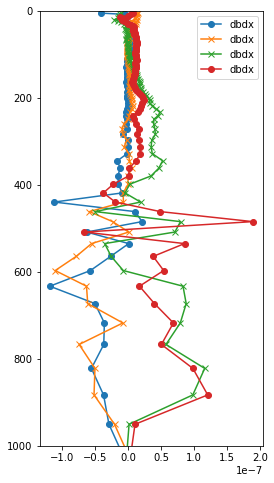

In [24]:
C = dbdy
D = dbdx

ylim = [1000,0]
fig, ax = plt.subplots(figsize=(4,8))
ax.plot(A[1:-1], depthi[1:-1], marker="o", label="dbdx")
#ax.plot(B[1:-1], depthc[1:-1], marker="x", label="dbdx")
ax.plot(C[1:-1], depthi[1:-1], marker="x", label="dbdx")
ax.plot(D[1:-1], depthi[1:-1], marker="x", label="dbdx")
ax.plot(E[1:-1], depthi[1:-1], marker="o", label="dbdx")
#ax.plot(N2g[1:-1], depthi[1:-1], marker="^", label="N2g")
#ax.plot(N2[:], depthi[1:-1], marker="x", label="N2_old")
#ax.plot(N2o[:], depthi[1:-1], marker="x", label="N2_o")
#ax.set_xlim([-1,30])
ax.set_ylim(ylim)
ax.legend()

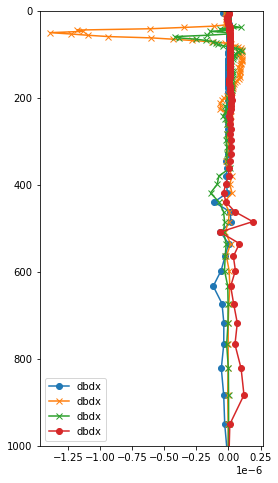

In [27]:
C = dbdy
D = dbdx

ylim = [1000,0]
fig, ax = plt.subplots(figsize=(4,8))
ax.plot(A[1:-1], depthi[1:-1], marker="o", label="dbdx")
#ax.plot(B[1:-1], depthc[1:-1], marker="x", label="dbdx")
ax.plot(C[1:-1], depthi[1:-1], marker="x", label="dbdx")
ax.plot(D[1:-1], depthi[1:-1], marker="x", label="dbdx")
ax.plot(E[1:-1], depthi[1:-1], marker="o", label="dbdx")
#ax.plot(N2g[1:-1], depthi[1:-1], marker="^", label="N2g")
#ax.plot(N2[:], depthi[1:-1], marker="x", label="N2_old")
#ax.plot(N2o[:], depthi[1:-1], marker="x", label="N2_o")
#ax.set_xlim([-1,30])
ax.set_ylim(ylim)
ax.legend()

In [17]:
toi.shape

(250,)

toi.min() -162.21791
toi.max() 5271336400.0
(250,)


ValueError: not enough values to unpack (expected 2, got 1)

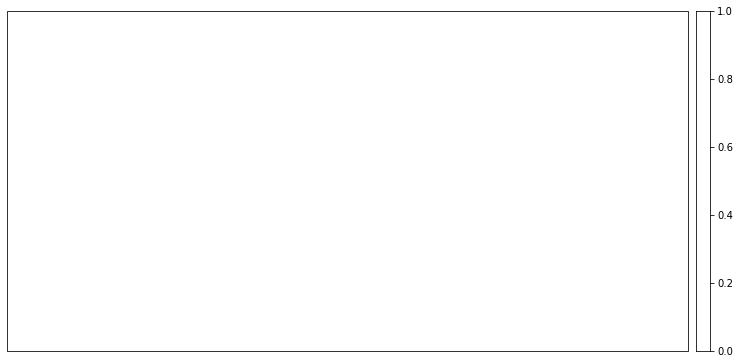

In [15]:
A = Ri_b #.isel(depthi=6)
hca, hcb = pyic.arrange_axes(1, 1, plot_cb=True, asp=0.5, fig_size_fac=3, projection=ccrs_proj, axlab_kw=None)

lon1 = lon_regm
lat1 = lat_regm
#lon, lat, toi = pyic.interp_to_rectgrid(A, fpath_ckdtree, lon_reg=lon_regm, lat_reg=(lat_regm[0],lat_regm[0]+0.02))
print('toi.min()', toi.min()); print('toi.max()', toi.max()) 
toi = np.array(toi)
print(toi.shape)
toi = toi.squeeze()
ii=-1
ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(lon, depthi, toi, ax=ax, cax=cax, transform=ccrs_proj, rasterized=False,  cmap='RdYlBu_r')
ax.set_title('Ri_b')
ax.set_xlim(lon1)
ax.set_ylim(lat1)

for ax in hca:
    pyic.plot_settings(ax, xlim=lon1, ylim=lat1)

ValueError: not enough values to unpack (expected 2, got 1)

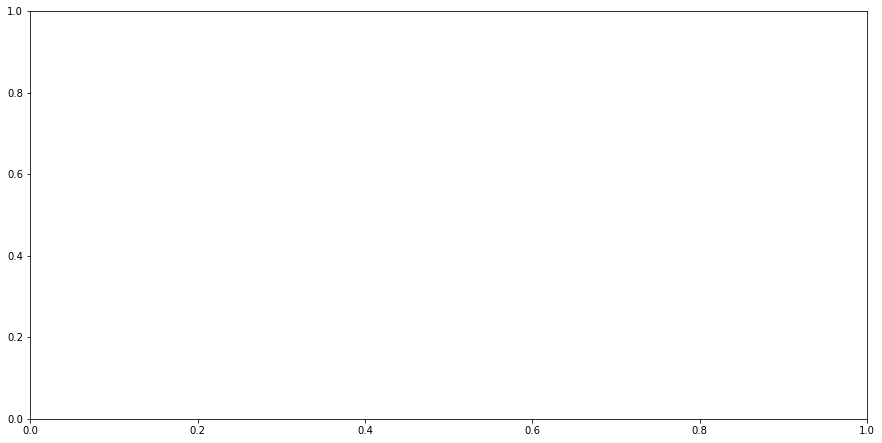

In [16]:
ylim=(5500,0)
#levels = np.array([-1e-5, 0, 1, 10, 100, 1000])
#cmap = plt.get_cmap('RdYlBu')
#norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)
fig, ax0 = plt.subplots( figsize=(15,7.5))
im = ax0.pcolormesh(lon, depthc, toi)
fig.colorbar(im, ax=ax0)
#ax0.set_title('pcolormesh with levels')
ax0.set_ylim(ylim)

toi.min() 32.167282
toi.max() 36.642662


Text(0.5, 1.0, 'Ri_b')

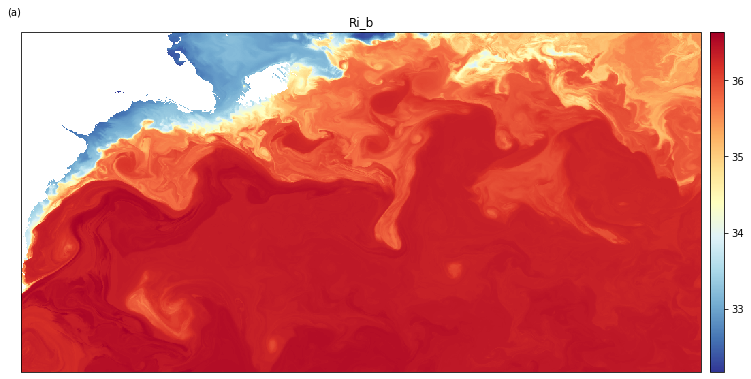

In [15]:
A = T
hca, hcb = pyic.arrange_axes(1, 1, plot_cb=True, asp=0.5, fig_size_fac=3, projection=ccrs_proj)

lon_reg_2 = lon_reg
lat_reg_2 = lat_reg
lon, lat, toi = pyic.interp_to_rectgrid(A, fpath_ckdtree, lon_reg=lon_reg_2, lat_reg=lat_reg_2)
print('toi.min()', toi.min()); print('toi.max()', toi.max())  
ii=-1
ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(lon, lat, toi, ax=ax, cax=cax, transform=ccrs_proj, rasterized=False)
ax.set_title('Ri_b')


In [92]:
import matplotlib.colors as colors

<ipython-input-191-abbb4e07a8e5>:13: UserWarning: The following kwargs were not used by contour: 'cax'
  pcm = ax.contourf(lon, lat, toi, cax=cax, norm=norm, cmap=cmap)


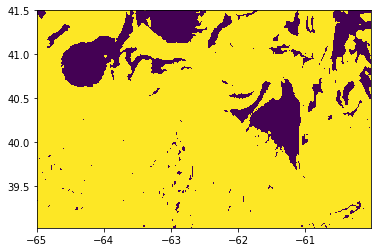

In [191]:
#colors_neg = plt.cm.PuBu(np.linspace(1, 0, 5))
#colors_pos = plt.cm.PuRd(np.linspace(0, 1, 5))
#all_colors = np.vstack((colors_neg, colors_pos))
#my_map = colors.LinearSegmentedColormap.from_list('my_map',all_colors)
#divnorm = colors.TwoSlopeNorm(vmin=-0.05, vcenter=0, vmax=10)

cmap = matplotlib.cm.viridis
bounds = [-1, 0, 1, 2]
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N, extend='both')

A = Ri_b #ic=7
fig,ax = plt.subplots()
pcm = ax.contourf(lon, lat, toi, cax=cax, norm=norm, cmap=cmap)
#fig.colorbar(pcm, ax=ax, extend='both', orientation='vertical')
#cbar = fig.colorbar(contourf_)
#cbar.set_clim( vmin, vmax )
    
#fig, ax = plt.subplots(figsize=(6, 1))
#fig.subplots_adjust(bottom=0.5)

#cmap = mpl.cm.viridis
#bounds = [-1, 2, 5, 7, 12, 15]
#norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')



In [181]:
A.shape


(59799625,)

toi.min() -0.17554703
toi.max() 0.12274883


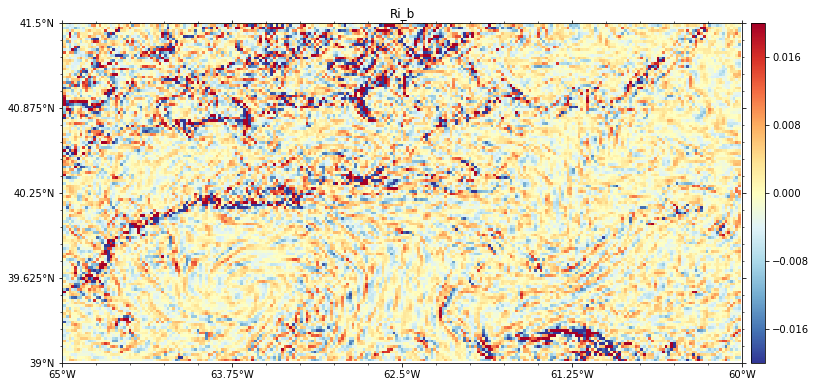

In [35]:
A = w #ic=10
hca, hcb = pyic.arrange_axes(1, 1, plot_cb=True, asp=0.5, fig_size_fac=3, projection=ccrs_proj, axlab_kw=None)

lon1 = lon_regm
lat1 = lat_regm
lon, lat, toi = pyic.interp_to_rectgrid(A, fpath_ckdtree, lon_reg=lon1, lat_reg=lat1)
print('toi.min()', toi.min()); print('toi.max()', toi.max())  
ii=-1
ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(lon, lat, toi, ax=ax, cax=cax, transform=ccrs_proj, rasterized=False, clim=0.02,  cmap='RdYlBu_r')
ax.set_title('Ri_b')
ax.set_xlim(lon1)
ax.set_ylim(lat1)

for ax in hca:
    pyic.plot_settings(ax, xlim=lon1, ylim=lat1)

toi.min() -0.019880906
toi.max() -0.01332127


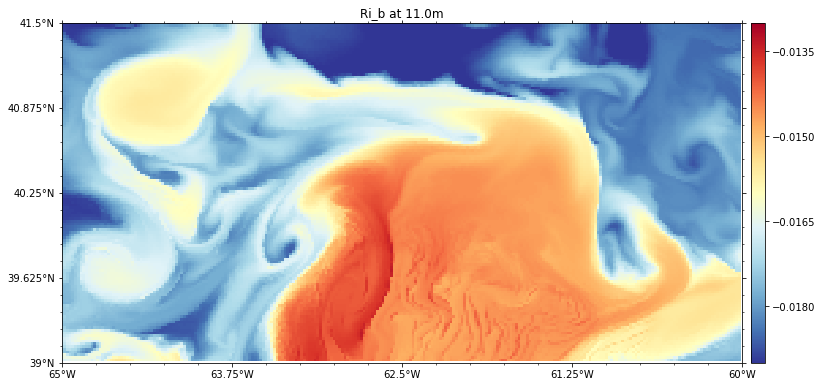

In [42]:
A = b #ic=10
hca, hcb = pyic.arrange_axes(1, 1, plot_cb=True, asp=0.5, fig_size_fac=3, projection=ccrs_proj, axlab_kw=None)

lon1 = lon_regm
lat1 = lat_regm
#lon, lat, toi = pyic.interp_to_rectgrid(A, fpath_ckdtree, lon_reg=lon1, lat_reg=lat1)
print('toi.min()', toi.min()); print('toi.max()', toi.max())  
ii=-1
ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(lon, lat, toi, ax=ax, cax=cax, transform=ccrs_proj, rasterized=False, clim= (-0.013, -0.019),   cmap='RdYlBu_r')
ax.set_title('Ri_b at %.1fm'%(depthi[iz]))
ax.set_xlim(lon1)
ax.set_ylim(lat1)

for ax in hca:
    pyic.plot_settings(ax, xlim=lon1, ylim=lat1)

In [38]:
ax.set_title('Ri at')

Text(0.5, 1.0, 'Ri at')

toi.min() -0.002094132
toi.max() 0.0029736045


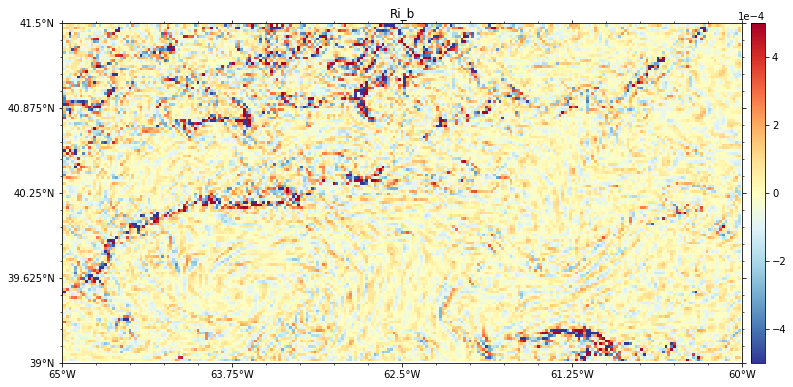

In [34]:
A = wb #ic=10
hca, hcb = pyic.arrange_axes(1, 1, plot_cb=True, asp=0.5, fig_size_fac=3, projection=ccrs_proj, axlab_kw=None)

lon1 = lon_regm
lat1 = lat_regm
lon, lat, toi = pyic.interp_to_rectgrid(A, fpath_ckdtree, lon_reg=lon1, lat_reg=lat1)
print('toi.min()', toi.min()); print('toi.max()', toi.max())  
ii=-1
ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(lon, lat, toi, ax=ax, cax=cax, transform=ccrs_proj, rasterized=False, clim=(5e-4),  cmap='RdYlBu_r')
ax.set_title('Ri_b')
ax.set_xlim(lon1)
ax.set_ylim(lat1)

for ax in hca:
    pyic.plot_settings(ax, xlim=lon1, ylim=lat1)

toi.min() -533271870.0
toi.max() 2.0282676e+16


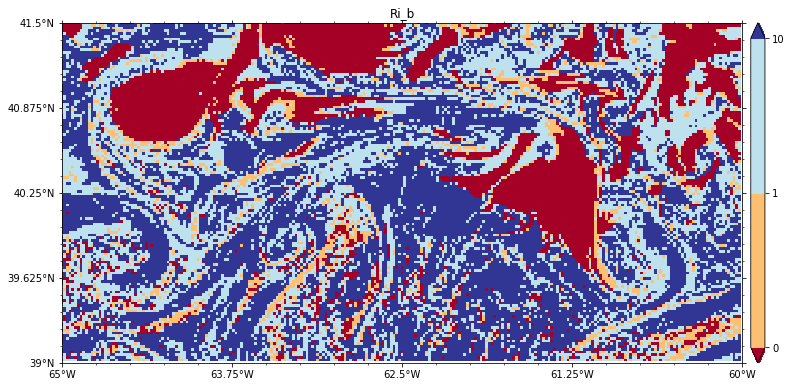

In [19]:
A = Ri_b #ic=20
hca, hcb = pyic.arrange_axes(1, 1, plot_cb=True, asp=0.5, fig_size_fac=3, projection=ccrs_proj, axlab_kw=None)

lon1 = lon_regm
lat1 = lat_regm
#lon, lat, toi = pyic.interp_to_rectgrid(A, fpath_ckdtree, lon_reg=lon1, lat_reg=lat1)
print('toi.min()', toi.min()); print('toi.max()', toi.max())  
ii=-1
ii+=1; ax=hca[ii]; cax=hcb[ii]
#pyic.shade(lon, lat, toi, ax=ax, cax=cax, transform=ccrs_proj, rasterized=False, cincr=1, clim=(0, 10), cmap='RdYlBu', contfs=True)
pyic.shade(lon, lat, toi, ax=ax, cax=cax, transform=ccrs_proj, rasterized=False, clevs=(0,1,10), clim=(0, 1000), cmap='RdYlBu')
ax.set_title('Ri_b')
ax.set_xlim(lon1)
ax.set_ylim(lat1)

for ax in hca:
    pyic.plot_settings(ax, xlim=lon1, ylim=lat1)

toi.min() -533271870.0
toi.max() 2.0282676e+16


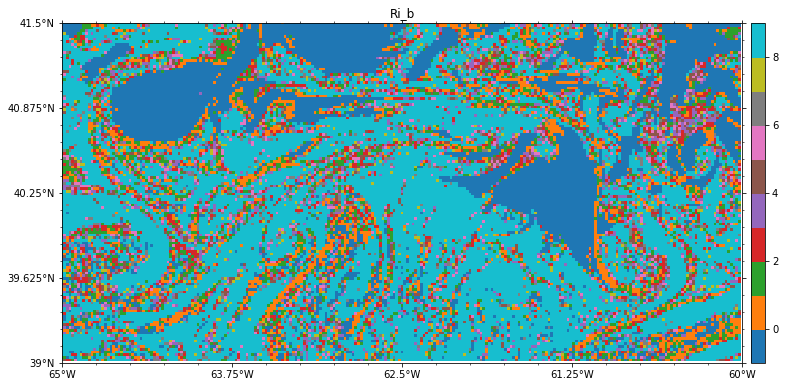

In [181]:
A = Ri_b #ic=30
hca, hcb = pyic.arrange_axes(1, 1, plot_cb=True, asp=0.5, fig_size_fac=3, projection=ccrs_proj, axlab_kw=None)

lon1 = lon_regm
lat1 = lat_regm
#lon, lat, toi = pyic.interp_to_rectgrid(A, fpath_ckdtree, lon_reg=lon1, lat_reg=lat1)
print('toi.min()', toi.min()); print('toi.max()', toi.max())  
ii=-1
ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(lon, lat, toi, ax=ax, cax=cax, transform=ccrs_proj, rasterized=False, clim=(-1, 9),  cmap='tab10')
#t = ax.contourf(lon, lat, toi, np.arange(-1000, 0, 5) ,cmap='winter_r')
ax.set_title('Ri_b')
ax.set_xlim(lon1)
ax.set_ylim(lat1)

for ax in hca:
    pyic.plot_settings(ax, xlim=lon1, ylim=lat1)

In [138]:
norm

toi.min() -60685468.0
toi.max() 8307471000.0


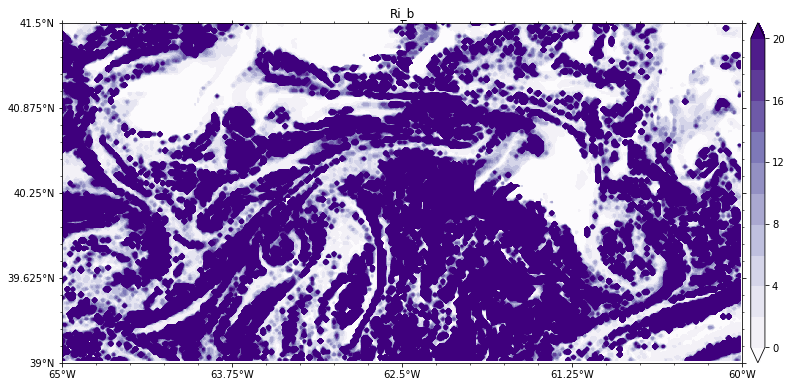

In [25]:
A = Ri_b #ic=30
hca, hcb = pyic.arrange_axes(1, 1, plot_cb=True, asp=0.5, fig_size_fac=3, projection=ccrs_proj, axlab_kw=None)

lon1 = lon_regm
lat1 = lat_regm
lon, lat, toi = pyic.interp_to_rectgrid(A, fpath_ckdtree, lon_reg=lon1, lat_reg=lat1)
print('toi.min()', toi.min()); print('toi.max()', toi.max())  
ii=-1
ii+=1; ax=hca[ii]; cax=hcb[ii]
hm1 = pyic.shade(lon, lat, toi, ax=ax, cax=cax, transform=ccrs_proj, rasterized=False, clim=(0, 20), cmap='Purples', contfs=True)
#t = ax.contourf(lon, lat, toi, np.arange(-1000, 0, 5) ,cmap='winter_r')
ax.set_title('Ri_b')
ax.set_xlim(lon1)
ax.set_ylim(lat1)

for ax in hca:
    pyic.plot_settings(ax, xlim=lon1, ylim=lat1)

In [29]:
lon, lat, toi = pyic.interp_to_rectgrid(A, fpath_ckdtree, lon_reg=lon1, lat_reg=lat1)

In [36]:
hm1[0].set_array(toi.flatten())

In [37]:
plt.draw()

<Figure size 432x288 with 0 Axes>

toi.min() -533271870.0
toi.max() 2.0282676e+16


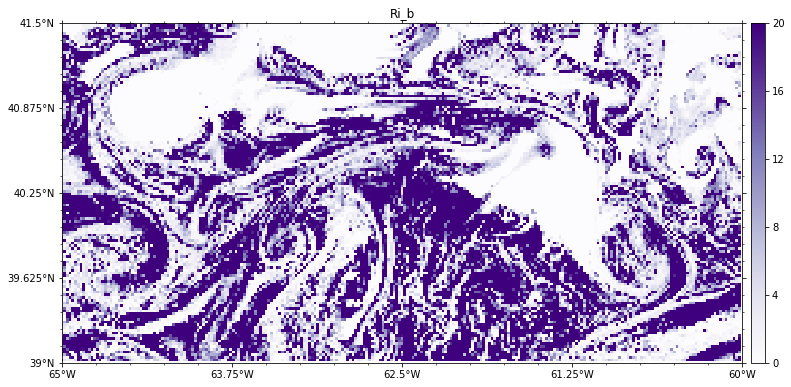

In [32]:
A = Ri_b #ic=90
hca, hcb = pyic.arrange_axes(1, 1, plot_cb=True, asp=0.5, fig_size_fac=3, projection=ccrs_proj, axlab_kw=None)

lon1 = lon_regm
lat1 = lat_regm
lon, lat, toi = pyic.interp_to_rectgrid(A, fpath_ckdtree, lon_reg=lon1, lat_reg=lat1)
print('toi.min()', toi.min()); print('toi.max()', toi.max())  
ii=-1
ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(lon, lat, toi, ax=ax, cax=cax, transform=ccrs_proj, rasterized=False, clim=(0, 20), cmap='Purples')
ax.set_title('Ri_b')
ax.set_xlim(lon1)
ax.set_ylim(lat1)

for ax in hca:
    pyic.plot_settings(ax, xlim=lon1, ylim=lat1)

toi.min() -0.002340212
toi.max() 0.0059544723


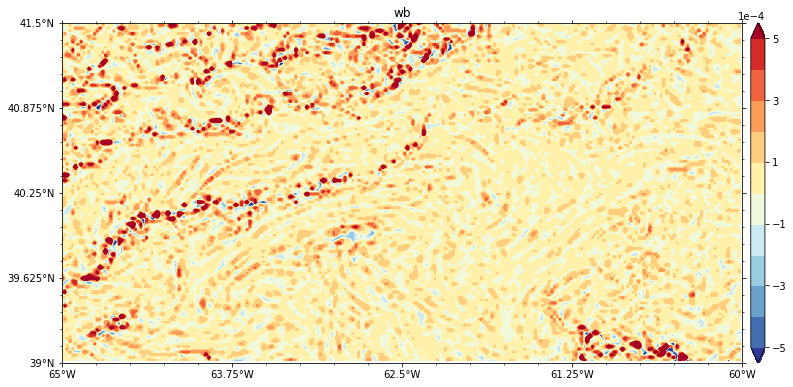

In [46]:
A = wb #ic=90
clim= 0.0005
hca, hcb = pyic.arrange_axes(1, 1, plot_cb=True, asp=0.5, fig_size_fac=3, projection=ccrs_proj, axlab_kw=None)

lon1 = lon_regm
lat1 = lat_regm
lon, lat, toi = pyic.interp_to_rectgrid(A, fpath_ckdtree, lon_reg=lon1, lat_reg=lat1)
print('toi.min()', toi.min()); print('toi.max()', toi.max())  
ii=-1
ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(lon, lat, toi, ax=ax, cax=cax, transform=ccrs_proj, rasterized=False,  clim=clim, cmap='RdYlBu_r', contfs=True)
ax.set_title('wb')
ax.set_xlim(lon1)
ax.set_ylim(lat1)

for ax in hca:
    pyic.plot_settings(ax, xlim=lon1, ylim=lat1)

toi.min() -1.8474559
toi.max() 6.444338


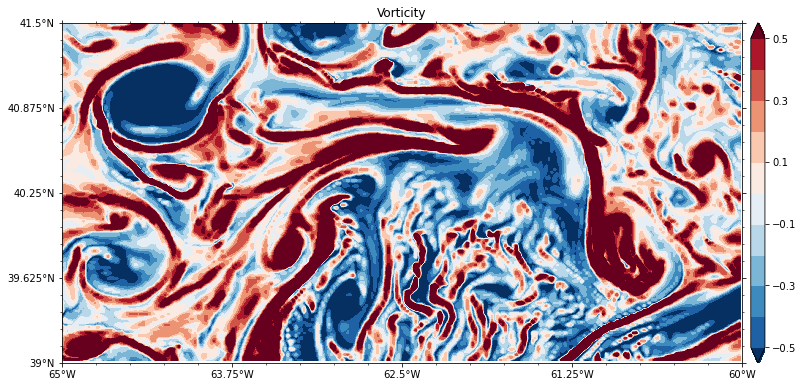

In [51]:
A = vort #ic=90
clim= 0.5
hca, hcb = pyic.arrange_axes(1, 1, plot_cb=True, asp=0.5, fig_size_fac=3, projection=ccrs_proj, axlab_kw=None)

lon1 = lon_regm
lat1 = lat_regm
lon, lat, toi = pyic.interp_to_rectgrid(A, fpath_ckdtree, lon_reg=lon1, lat_reg=lat1)
print('toi.min()', toi.min()); print('toi.max()', toi.max())  
ii=-1
ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(lon, lat, toi, ax=ax, cax=cax, transform=ccrs_proj, rasterized=False, clim=clim, contfs=True)
#t = ax.contourf(lon, lat, toi, np.arange(-1, 1, 0.05) ,cmap='RdYlBu_r')
ax.set_title('Vorticity')
ax.set_xlim(lon1)
ax.set_ylim(lat1)

for ax in hca:
    pyic.plot_settings(ax, xlim=lon1, ylim=lat1)

toi.min() -0.33792946
toi.max() 0.120978564


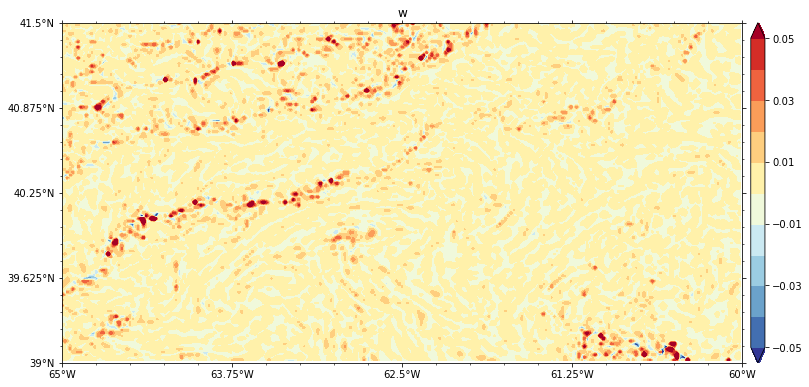

In [114]:
A = w #ic=90
clim= 0.05
hca, hcb = pyic.arrange_axes(1, 1, plot_cb=True, asp=0.5, fig_size_fac=3, projection=ccrs_proj, axlab_kw=None)

lon1 = lon_regm
lat1 = lat_regm
lon, lat, toi = pyic.interp_to_rectgrid(A, fpath_ckdtree, lon_reg=lon1, lat_reg=lat1)
print('toi.min()', toi.min()); print('toi.max()', toi.max())  
ii=-1
ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(lon, lat, toi, ax=ax, cax=cax, transform=ccrs_proj, clim=clim, contfs=True,  cmap='RdYlBu_r')
#t = ax.contourf(lon, lat, toi, np.arange(-0.05, 0.05, 0.01) ,cmap='PuOr_r')
ax.set_title('w')
ax.set_xlim(lon1)
ax.set_ylim(lat1)

for ax in hca:
    pyic.plot_settings(ax, xlim=lon1, ylim=lat1)

#### test 4 images

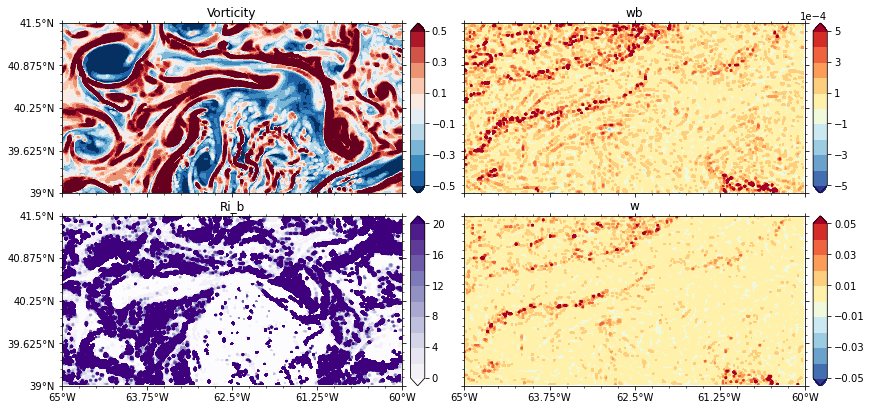

In [54]:
    ccrs_proj = ccrs.PlateCarree()
    lon1 = lon_regm
    lat1 = lat_regm
    
    # ---
    hca, hcb = pyic.arrange_axes(2,2, plot_cb=True, asp=0.5, fig_size_fac=1.5,
                                 sharex=True, sharey=True, xlabel="", ylabel="",
                                 projection=ccrs_proj,
                                 dfigt=1.0, axlab_kw=None,
                                 )
    ii=-1
    
    # ---
    A = vort
    clim = 0.5
    ii+=1; ax=hca[ii]; cax=hcb[ii]
    lon, lat, toi = pyic.interp_to_rectgrid(A, fpath_ckdtree, lon_reg=lon1, lat_reg=lat1)
    hm1 = pyic.shade(lon, lat, toi, ax=ax, cax=cax, transform=ccrs_proj, rasterized=False, clim=clim, contfs=True)
    ax.set_title('Vorticity')
    ax.set_xlim(lon1)
    ax.set_ylim(lat1)

    # ---
    A = wb
    clim = 0.0005
    ii+=1; ax=hca[ii]; cax=hcb[ii]
    lon, lat, toi = pyic.interp_to_rectgrid(A, fpath_ckdtree, lon_reg=lon1, lat_reg=lat1)
    hm2 = pyic.shade(lon, lat, toi, ax=ax, cax=cax, transform=ccrs_proj, rasterized=False, clim=clim, cmap='RdYlBu_r', contfs=True)
    ax.set_title('wb')
    ax.set_xlim(lon1)
    ax.set_ylim(lat1)

    
    # ---
    A = Ri_b #ic=20
    clim = np.array([0, 20])
    ii+=1; ax=hca[ii]; cax=hcb[ii]
    lon, lat, toi = pyic.interp_to_rectgrid(A, fpath_ckdtree, lon_reg=lon1, lat_reg=lat1)
    hm3 = pyic.shade(lon, lat, toi, ax=ax, cax=cax, transform=ccrs_proj, rasterized=False, clim=clim, cmap='Purples', contfs=True)
    ax.set_title('Ri_b')
    ax.set_xlim(lon1)
    ax.set_ylim(lat1)
    
    # ---
    A = w
    clim = 0.05
    ii+=1; ax=hca[ii]; cax=hcb[ii]
    lon, lat, toi = pyic.interp_to_rectgrid(A, fpath_ckdtree, lon_reg=lon1, lat_reg=lat1)
    hm4 = pyic.shade(lon, lat, toi, ax=ax, cax=cax, transform=ccrs_proj, rasterized=False, clim=clim, cmap='RdYlBu_r', contfs=True)
    ax.set_title('w')
    ax.set_xlim(lon1)
    ax.set_ylim(lat1)
    
    for ax in hca:
        pyic.plot_settings(ax, xlim=lon1, ylim=lat1)


#### plot ustress

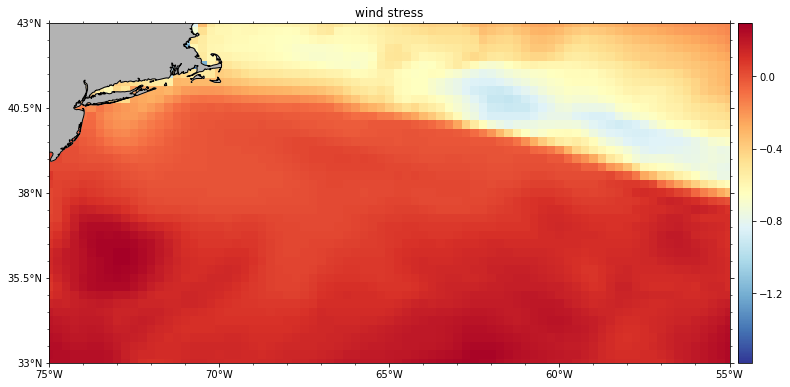

In [52]:
lon1 = lon_reg
lat1 = lat_reg
A = ustress.isel(time=1)
clim = 0.05
hca, hcb = pyic.arrange_axes(1, 1, plot_cb=True, asp=0.5, fig_size_fac=3, projection=ccrs_proj, axlab_kw=None)
ii=-1
ii+=1; ax=hca[ii]; cax=hcb[ii]
#lon, lat, toi = pyic.interp_to_rectgrid(A, fpath_ckdtree, lon_reg=lon1, lat_reg=lat1)
hm4 = pyic.shade(ustress.lon, ustress.lat, A.var180, ax=ax, cax=cax, transform=ccrs_proj, rasterized=False,  cmap='RdYlBu_r')
ax.set_title('wind stress')
ax.set_xlim(lon1)
ax.set_ylim(lat1)
    
for ax in hca:
    pyic.plot_settings(ax, xlim=lon1, ylim=lat1)

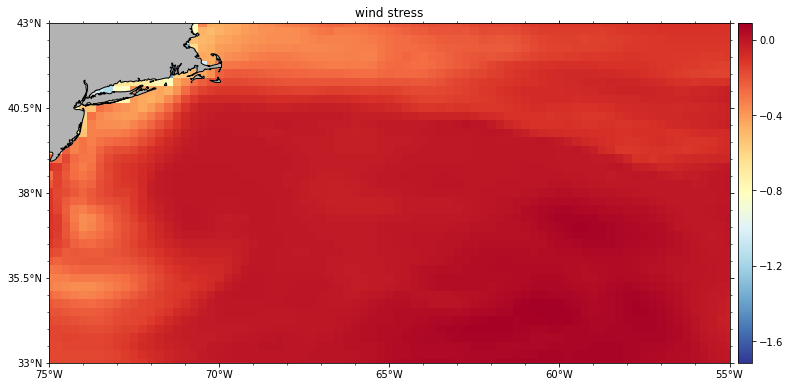

In [65]:
lon1 = lon_reg
lat1 = lat_reg
A = vstress.isel(time=1)
clim = 0.05
hca, hcb = pyic.arrange_axes(1, 1, plot_cb=True, asp=0.5, fig_size_fac=3, projection=ccrs_proj, axlab_kw=None)
ii=-1
ii+=1; ax=hca[ii]; cax=hcb[ii]
#lon, lat, toi = pyic.interp_to_rectgrid(A, fpath_ckdtree, lon_reg=lon1, lat_reg=lat1)
hm4 = pyic.shade(vstress.lon, vstress.lat, A.var180, ax=ax, cax=cax, transform=ccrs_proj, rasterized=False,  cmap='RdYlBu_r')
ax.set_title('wind stress')
ax.set_xlim(lon1)
ax.set_ylim(lat1)
    
for ax in hca:
    pyic.plot_settings(ax, xlim=lon1, ylim=lat1)

In [64]:
lon1 = lon_regm
lat1 = lat_regm
A = windstress.isel(time=1)
clim = 0.05
hca, hcb = pyic.arrange_axes(1, 1, plot_cb=True, asp=0.5, fig_size_fac=3, projection=ccrs_proj, axlab_kw=None)
ii=-1
ii+=1; ax=hca[ii]; cax=hcb[ii]
#lon, lat, toi = pyic.interp_to_rectgrid(A, fpath_ckdtree, lon_reg=lon1, lat_reg=lat1)
hm4 = pyic.shade(windstress.lon, windstress.lat, A.var180, ax=ax, cax=cax, transform=ccrs_proj, rasterized=False,  cmap='RdYlBu_r')
ax.set_title('wind stress')
ax.set_xlim(lon1)
ax.set_ylim(lat1)
    
for ax in hca:
    pyic.plot_settings(ax, xlim=lon1, ylim=lat1)

In [80]:
toi4 = windstress.var180.sel(time=timesd[791])
toi4.data

array([[0.37183923, 0.4447381 , 0.4675338 , ..., 0.238771  , 0.23489587,
        0.22549662],
       [0.5424836 , 0.592679  , 0.645367  , ..., 0.25948018, 0.2525446 ,
        0.24230412],
       [0.9138723 , 1.0067441 , 1.1000421 , ..., 0.28674087, 0.27928796,
        0.26244026],
       ...,
       [0.29331398, 0.29331684, 0.2782948 , ..., 0.17740925, 0.18571205,
        0.19919528],
       [0.3058    , 0.30709103, 0.30377603, ..., 0.18364462, 0.19043207,
        0.20447004],
       [0.30896837, 0.3130232 , 0.3135963 , ..., 0.19554101, 0.19916156,
        0.2060626 ]], dtype=float32)

In [85]:
6371*2*np.pi/360


111.19492664455873

In [16]:
lon1 = lon_regm
lat1 = lat_regm

X = ustress.lon.data
Y = ustress.lat.data
X, Y = np.meshgrid(X, Y)
U = ustress.isel(time=10).var180.data
V = vstress.isel(time=10).var180.data
C = windstress.isel(time=10).var180.data
#hca, hcb = pyic.arrange_axes(1, 1, plot_cb=True, asp=0.5, fig_size_fac=3, projection=ccrs_proj, axlab_kw=None)
fig, (ax0) = plt.subplots(figsize=(15,7.5))
#ax0 = pyic.shade(windstress.lon, windstress.lat, A.var180, ax=ax, cax=cax, transform=ccrs_proj, rasterized=False,  cmap='RdYlBu_r')
c = ax0.pcolor(X, Y, C, cmap='RdYlBu_r')
fig.colorbar(c, ax=ax0)
ax0.quiver(X, Y, U, V)
ax0.set_title('wind stress')
ax0.set_xlim(lon1)
ax0.set_ylim(lat1)

<ipython-input-16-95683b62ad2f>:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c = ax0.pcolor(X, Y, C, cmap='RdYlBu_r')


(39.0, 41.5)

In [84]:
C.shape

(169, 41, 81)

In [10]:
A = Ri_b
lon1 = lon_regm
lat1 = lat_regm
lon, lat, toi = pyic.interp_to_rectgrid(A, fpath_ckdtree, lon_reg=lon1, lat_reg=lat1)

In [22]:
toi.shape

(125, 250)

In [148]:
y, x = np.meshgrid(lon,lat)
z = toi

In [149]:
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator

<ipython-input-152-4b2673a3e6d9>:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax0.pcolormesh(y, x, z, cmap=cmap, norm=norm)


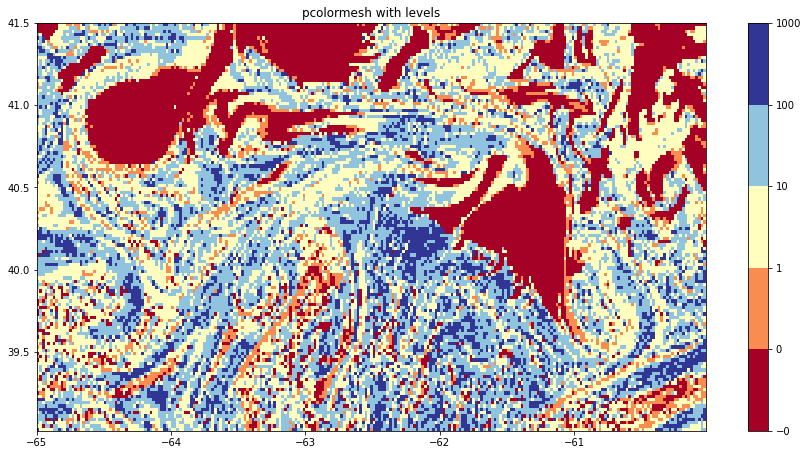

In [152]:


# make these smaller to increase the resolution
#dx, dy = 0.05, 0.05

# generate 2 2d grids for the x & y bounds
#y, x = np.mgrid[slice(1, 5 + dy, dy),
#                slice(1, 5 + dx, dx)]

#z = np.sin(x)**10 + np.cos(10 + y*x) * np.cos(x)

# x and y are bounds, so z should be the value *inside* those bounds.
# Therefore, remove the last value from the z array.
#z = z[:-1, :-1]
#levels = MaxNLocator(nbins=15).tick_values(z.min(), z.max())



# pick the desired colormap, sensible levels, and define a normalization
# instance which takes data values and translates those into levels.
levels = np.array([-1e-5, 0, 1, 10, 100, 1000])
cmap = plt.get_cmap('RdYlBu')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)
fig, (ax0) = plt.subplots(nrows=1, figsize=(15,7.5))
im = ax0.pcolormesh(y, x, z, cmap=cmap, norm=norm)
fig.colorbar(im, ax=ax0)
ax0.set_title('pcolormesh with levels')


# contours are *point* based plots, so convert our bound into point
# centers
#cf = ax1.contourf(y,
#                  x, z, levels=levels,
#                  cmap=cmap)
#fig.colorbar(cf, ax=ax1)
#ax1.set_title('contourf with levels')

# adjust spacing between subplots so `ax1` title and `ax0` tick labels
# don't overlap
#fig.tight_layout()

plt.show()

In [33]:
levels

array([-1.50e+15,  0.00e+00,  1.50e+15,  3.00e+15,  4.50e+15,  6.00e+15,
        7.50e+15,  9.00e+15,  1.05e+16,  1.20e+16,  1.35e+16,  1.50e+16,
        1.65e+16,  1.80e+16,  1.95e+16,  2.10e+16])

In [157]:
depthi[6]

20.0